# Imporing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import datetime

C:\Users\AKSHATA\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Reading csv file using read_csv
I am analyzig crime data from 2012 to 2017

In [2]:
crime_data=pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [3]:
crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


# Checking null values

In [4]:
crime_data.loc[:,crime_data.isna().any()]

,Case Number,Location Description,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,HZ250496,APARTMENT,10.0,24.0,29.0,1154907.0,1893681.0,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,HZ250409,RESIDENCE,3.0,20.0,42.0,1183066.0,1864330.0,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,HZ250503,STREET,15.0,37.0,25.0,1140789.0,1904819.0,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,HZ250424,SIDEWALK,15.0,28.0,25.0,1143223.0,1901475.0,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,HZ250455,RESIDENCE,15.0,28.0,25.0,1139890.0,1901675.0,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,HZ250447,STREET,6.0,8.0,44.0,1183336.0,1850642.0,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,HZ250489,CHA HALLWAY/STAIRWELL/ELEVATOR,1.0,3.0,35.0,1176730.0,1886544.0,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,HZ250514,RESIDENCE PORCH/HALLWAY,2.0,3.0,38.0,1178514.0,1874573.0,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,HZ250523,SIDEWALK,24.0,40.0,1.0,1165696.0,1942616.0,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,HZ250667,STREET,7.0,17.0,67.0,1166876.0,1858796.0,41.768097,-87.663879,"(41.768096835, -87.663878589)"


# Dropping null values if any and unnecessary columns

In [5]:
crime_data = crime_data.dropna()
crime_data = crime_data.drop(columns=['Unnamed: 0', 'ID', 'Case Number', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)

# Cleaned Data

In [6]:
crime_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,25.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,25.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [7]:
crime_data['Date']=pd.to_datetime(crime_data['Date'])

# Extracting day and yer form date column

In [8]:

crime_data['Day']=crime_data['Date'].apply(lambda x: x.strftime("%A"))
crime_data['Year']=crime_data['Date'].apply(lambda x: x.year)


# Getiing county name based on location cordinates using google API

As data set has more than 200,000 records.I use google API to get county name so that I can find crime rates according to counties but it was taking more time to process all records.So I have shown implementation only for one record.

In [9]:
from urllib.request import urlopen
import json
def getPlace(start_station_latitude, start_station_longitude):
    url = "https://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&key=KEY" % (start_station_latitude, start_station_longitude)
    v = urlopen(url).read()
    j = json.loads(v)
    components = j['results'][0]['address_components']
    town =None
    for c in components:
        if "postal_town" in c['types']:
            town = c['long_name']
        if "administrative_area_level_2" in c['types']:
            town = c['long_name']
    return town
dfcounty=crime_data[:1]
for index,row in dfcounty.iterrows():
    town=getPlace(row['Latitude'], row['Longitude'])

In [10]:
town

'Cook County'

In [11]:
crime_data.to_csv("2017.csv",index=False)

In [12]:
crime_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location,Day
0,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)",Tuesday
1,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)",Tuesday
2,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,25.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)",Tuesday
3,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,25.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)",Tuesday
4,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",Tuesday


# Crime count by location

After getting location wise count, We can see most of the crime happens on street

In [13]:
pd.value_counts(crime_data['Location Description'])

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
RESIDENCE-GARAGE                   25256
RESTAURANT                         25196
RESIDENCE PORCH/HALLWAY            25001
VEHICLE NON-COMMERCIAL             23996
DEPARTMENT STORE                   20360
GROCERY FOOD STORE                 15742
GAS STATION                        15019
PARK PROPERTY                      12107
BAR OR TAVERN                       9603
COMMERCIAL / BUSINESS OFFICE        7412
CTA PLATFORM                        7173
CTA TRAIN                           6968
CONVENIENCE STORE                   6544
VACANT LOT/LAND                     6507
SCHOOL, PUBLIC, 

In [14]:
pd.value_counts(crime_data['Block'])

001XX N STATE ST                       3567
0000X W TERMINAL ST                    2671
008XX N MICHIGAN AVE                   2430
076XX S CICERO AVE                     2090
0000X N STATE ST                       1810
064XX S DR MARTIN LUTHER KING JR DR    1319
083XX S STEWART AVE                    1201
063XX S DR MARTIN LUTHER KING JR DR    1116
051XX W MADISON ST                     1104
046XX W NORTH AVE                      1097
009XX W BELMONT AVE                    1078
011XX S CANAL ST                       1053
008XX N STATE ST                       1039
040XX W LAKE ST                        1001
006XX N MICHIGAN AVE                    930
0000X W HUBBARD ST                      900
038XX W ROOSEVELT RD                    891
012XX S WABASH AVE                      891
0000X S STATE ST                        885
007XX N MICHIGAN AVE                    880
042XX W MADISON ST                      880
035XX N CLARK ST                        871
100XX W OHARE ST                

# Primary type of crime 
in chicago Theft is most common crime type

In [15]:
df=pd.value_counts(crime_data['Primary Type'])

In [16]:
df

THEFT                                321950
BATTERY                              258941
CRIMINAL DAMAGE                      152812
NARCOTICS                            131177
ASSAULT                               89508
OTHER OFFENSE                         85361
BURGLARY                              81668
DECEPTIVE PRACTICE                    67609
MOTOR VEHICLE THEFT                   59856
ROBBERY                               56092
CRIMINAL TRESPASS                     36429
WEAPONS VIOLATION                     16983
PUBLIC PEACE VIOLATION                13015
OFFENSE INVOLVING CHILDREN            10590
PROSTITUTION                           7567
CRIM SEXUAL ASSAULT                    6298
INTERFERENCE WITH PUBLIC OFFICER       6136
SEX OFFENSE                            4491
HOMICIDE                               2590
GAMBLING                               2211
ARSON                                  2175
LIQUOR LAW VIOLATION                   1928
KIDNAPPING                      

In [17]:
Location_df=pd.DataFrame({"Counts" : crime_data['Location Description'].value_counts(), "Location" : crime_data["Location Description"].value_counts().index})

In [18]:
Location_df

,Counts,Location
STREET,325084,STREET
RESIDENCE,223854,RESIDENCE
APARTMENT,179444,APARTMENT
SIDEWALK,158478,SIDEWALK
OTHER,53474,OTHER
PARKING LOT/GARAGE(NON.RESID.),40907,PARKING LOT/GARAGE(NON.RESID.)
ALLEY,31239,ALLEY
RESIDENTIAL YARD (FRONT/BACK),30209,RESIDENTIAL YARD (FRONT/BACK)
SMALL RETAIL STORE,28209,SMALL RETAIL STORE
"SCHOOL, PUBLIC, BUILDING",25474,"SCHOOL, PUBLIC, BUILDING"


# plotting bar graph 

<Figure size 1080x720 with 0 Axes>

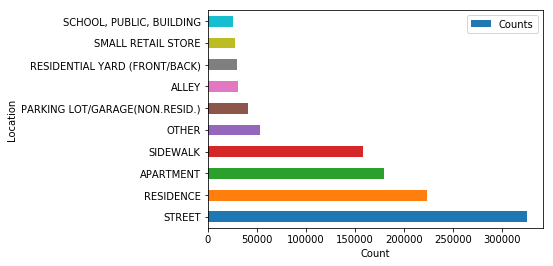

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize = (15, 10))
Location_df.iloc[:10].plot(x='Location',y='Counts',kind='barh')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()
plt.savefig('Highest crime count.png')

# Plotting crime data on map

In [20]:
locations = crime_data.groupby('Community Area').first()

In [21]:
locations

,Date,Block,Primary Type,Description,Location Description,Arrest,Year,Latitude,Longitude,Location,Day
Community Area,,,,,,,,,,,
0.0,2012-02-19 18:54:00,051XX S RUTHERFORD AVE,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,2012,41.799090,-87.790549,"(41.799089601, -87.790549465)",Sunday
1.0,2016-05-03 16:00:00,014XX W DEVON AVE,BATTERY,SIMPLE,SIDEWALK,False,2016,41.998131,-87.665814,"(41.99813061, -87.665814038)",Tuesday
2.0,2016-05-03 22:00:00,065XX N WHIPPLE ST,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,2016,41.999731,-87.705810,"(41.99973106, -87.705809711)",Tuesday
3.0,2016-05-03 21:35:00,050XX N PAULINA ST,ASSAULT,SIMPLE,HOSPITAL BUILDING/GROUNDS,False,2016,41.972843,-87.671127,"(41.972843435, -87.671127232)",Tuesday
4.0,2016-05-04 00:01:00,026XX W CATALPA AVE,CRIMINAL DAMAGE,TO VEHICLE,RESIDENTIAL YARD (FRONT/BACK),False,2016,41.981316,-87.695119,"(41.9813162, -87.695118674)",Wednesday
5.0,2016-05-04 04:00:00,019XX W MONTROSE AVE,CRIMINAL DAMAGE,TO PROPERTY,MEDICAL/DENTAL OFFICE,False,2016,41.961482,-87.676856,"(41.961482397, -87.676855619)",Wednesday
6.0,2016-05-03 21:45:00,037XX N WILTON AVE,THEFT,OVER $500,RESIDENCE PORCH/HALLWAY,False,2016,41.949986,-87.653197,"(41.949986394, -87.65319658)",Tuesday
7.0,2016-05-03 18:30:00,025XX N GREENVIEW AVE,THEFT,OVER $500,RESIDENCE-GARAGE,False,2016,41.927322,-87.665810,"(41.927321839, -87.665810418)",Tuesday
8.0,2016-05-03 23:11:00,006XX N WABASH AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,2016,41.893027,-87.626751,"(41.893026751, -87.626750829)",Tuesday


In [22]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [23]:
new_locations.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
0.0,41.799090,-87.790549,RESIDENCE-GARAGE,False
1.0,41.998131,-87.665814,SIDEWALK,False
2.0,41.999731,-87.705810,STREET,False
3.0,41.972843,-87.671127,HOSPITAL BUILDING/GROUNDS,False
4.0,41.981316,-87.695119,RESIDENTIAL YARD (FRONT/BACK),False


# Using follium to plot crime location 

In [24]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

# popup text to each location

In [25]:
popup_text= """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""

In [26]:
for i in range(len(new_locations)):
    lat=new_locations.iloc[i][0]
    long=new_locations.iloc[i][1]
    popup_text=popup_text.format(new_locations.index[i],new_locations.iloc[i][-1],new_locations.iloc[i][-2])
    folium.CircleMarker(location=[lat,long],popup=popup_text,fill=True).add_to(chicago_map)

In [27]:
chicago_map

In [28]:
unique_locations=pd.value_counts(crime_data['Location'])

# Getting co-ordnates of the  location

In [29]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [30]:
def cordinate_extract(raw_string):
    cordinate=raw_string[1:-1].split(',')
    lat=float(cordinate[0])
    long=float(cordinate[1])
    return(lat,long)

In [31]:
CR_index['Cordinates']=CR_index['Raw_String'].apply(cordinate_extract)

In [32]:
CR_index=CR_index.drop(columns='Raw_String',axis=1)

In [33]:
CR_index.head()

,ValueCount,Cordinates
0,2093,"(41.883500187, -87.627876698)"
1,2082,"(41.754592961, -87.741528537)"
2,1338,"(41.979006297, -87.906463155)"
3,1319,"(41.897895128, -87.624096605)"
4,1122,"(41.742710224, -87.634088181)"


In [34]:
 lat = CR_index['Cordinates'].iloc[1][0]

In [35]:
crime_map=folium.Map(location=[41.883500187, -87.627876698],zoom_start=13,tiles="CartoDB dark_matter")
for i in range(500):
    lat=CR_index['Cordinates'].iloc[i][0]
    long=CR_index['Cordinates'].iloc[i][1]
    radius=CR_index['ValueCount'].iloc[i]/45
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#ff0000"
    else:
        color = "#803b00"
    
    popup_text = """Incidents : {}<br>
                    Latitude : {}<br>
                    Longitude : {}<br>"""
    popup_text = popup_text.format(CR_index['ValueCount'].iloc[i],lat,
                               long)
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)

In [36]:
crime_map

In [37]:
crime_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location,Day
0,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,29.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)",Tuesday
1,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,42.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)",Tuesday
2,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,25.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)",Tuesday
3,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,25.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)",Tuesday
4,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",Tuesday


In [38]:
df_theft = crime_data[crime_data['Primary Type'] == 'THEFT']

In [39]:
df_theft.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Community Area,Year,Latitude,Longitude,Location,Day
4,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,25.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)",Tuesday
12,2016-05-03 17:30:00,011XX W JACKSON BLVD,THEFT,FROM BUILDING,OTHER,False,28.0,2016,41.877812,-87.655758,"(41.877811861, -87.655758012)",Tuesday
13,2016-05-03 09:00:00,028XX S DR MARTIN LUTHER KING JR DR,THEFT,$500 AND UNDER,STREET,False,35.0,2016,41.843017,-87.617227,"(41.843016958, -87.61722727)",Tuesday
14,2016-05-03 22:08:00,016XX N CLAREMONT AVE,THEFT,OVER $500,STREET,False,24.0,2016,41.910901,-87.686019,"(41.910900826, -87.686018747)",Tuesday
16,2016-05-03 21:45:00,020XX W LE MOYNE ST,THEFT,OVER $500,STREET,False,24.0,2016,41.908237,-87.678437,"(41.908237096, -87.678437417)",Tuesday


# Getting count of unresolved theft cases

In [40]:
df_theft['Arrest'].apply(lambda x: x=='False').value_counts()

False    321950
Name: Arrest, dtype: int64

# Getting count of theft happend on particular day

In [41]:
theft_per_day = pd.DataFrame({"thefts" : df_theft['Day'].value_counts(), "Day" : df_theft["Day"].value_counts().index}, index = range(7))

In [42]:
theft_per_day=pd.DataFrame({"thefts" : df_theft['Day'].value_counts(), "Day" : df_theft["Day"].value_counts().index})

In [43]:
theft_per_day

,thefts,Day
Friday,49836,Friday
Wednesday,46557,Wednesday
Monday,46141,Monday
Thursday,46092,Thursday
Saturday,46076,Saturday
Tuesday,46032,Tuesday
Sunday,41216,Sunday


# Plotting bar graph for crime rate per day

<Figure size 1152x1224 with 0 Axes>

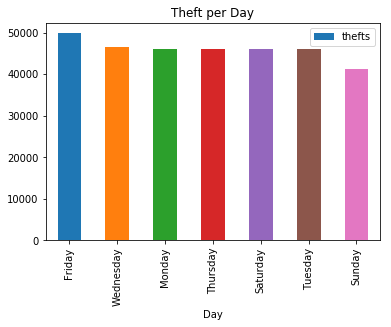

In [44]:
plt.figure(figsize = (16, 17))
theft_per_day.plot(x='Day',y='thefts',kind='bar')
plt.title('Theft per Day')
plt.show()